In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk

In [2]:
df=pd.read_csv('Mapping.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,emoticons,number
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [3]:
df['emoticons'].value_counts()

emoticons
😜     1
📸     1
💜     1
😊     1
😎     1
💕     1
💙     1
✨     1
☀     1
🇺🇸    1
😁     1
❤     1
😘     1
🔥     1
📷     1
🎄     1
😉     1
😂     1
😍     1
💯     1
Name: count, dtype: int64

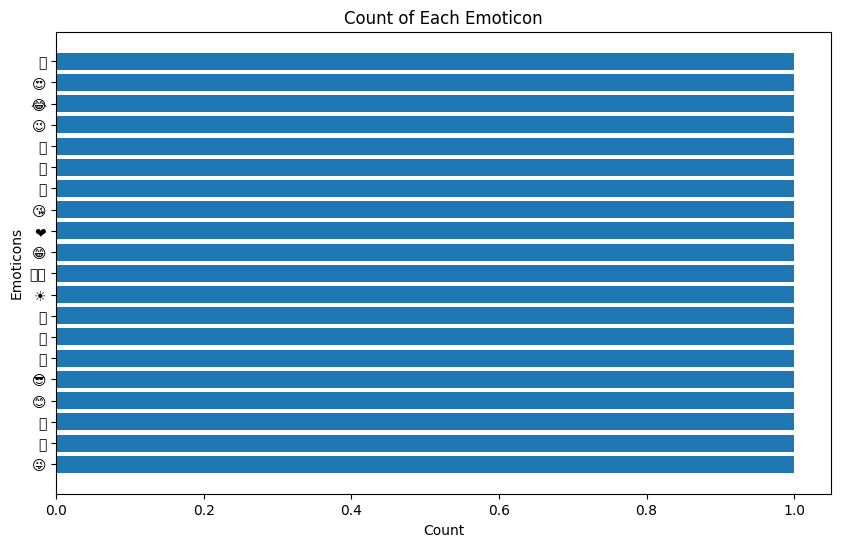

In [4]:
warnings.filterwarnings('ignore')
emoticon_counts = df['emoticons'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(emoticon_counts.index, emoticon_counts.values)
plt.xlabel('Count')
plt.ylabel('Emoticons')
plt.title('Count of Each Emoticon')
plt.show()

In [5]:
train=pd.read_csv('Train.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
train

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3
...,...,...
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3


In [6]:
train.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [7]:
train.tail()

,TEXT,Label
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3
69999,We Love you Robbie @ Heritage Memorial Cemeter...,14


In [9]:
train.isna().sum()

TEXT     0
Label    0
dtype: int64

In [10]:
train.dtypes

TEXT     object
Label     int64
dtype: object

In [11]:
count=train['Label'].value_counts()
count

Label
9     15091
2      7076
3      6842
7      4363
15     3843
13     3250
16     2832
17     2751
1      2592
11     2434
14     2342
6      2083
8      1992
5      1977
12     1909
4      1878
19     1745
18     1722
10     1721
0      1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

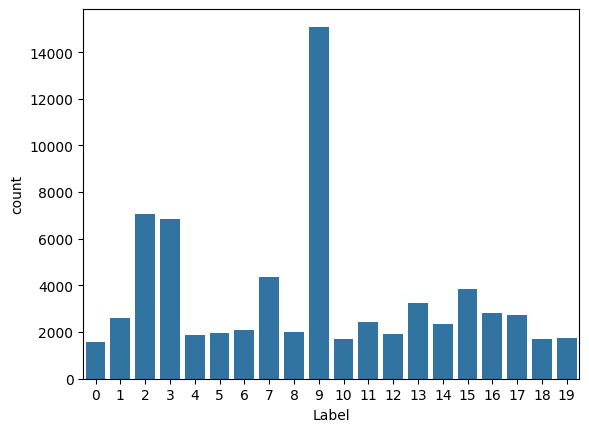

In [12]:
sns.countplot(x='Label',data=train)

In [13]:
train = train.sample(frac = 1)

# next highest value is number 2 with 7076 values
number = train.loc[train['Label'] == 9][:7076]
train = train[train.Label != 9]
train = pd.concat([train, number])
train = train.sample(frac = 1)
train.reset_index(drop = True, inplace = True)
train

,TEXT,Label
0,Tis the season to sparkle #shareyourears #very...,13
1,Bae is back on the blog today! Today's post is...,2
2,"Happy birthday to my brother who says ""yes"" (u...",0
3,just a little something we are working on for ...,13
4,She so sexy #BMW #M4 #Smurf @ The Woodlands Ma...,2
...,...,...
61980,Perfect for this cold weather and I got it for...,4
61981,The Eshe Cuff Eshe is a Ethiopian girls name m...,13
61982,We talked it out and Taylor and I don't have a...,9
61983,"Hanging with number 6 son, while I wait for hu...",9


In [14]:
train['Label'].value_counts()

Label
2     7076
9     7076
3     6842
7     4363
15    3843
13    3250
16    2832
17    2751
1     2592
11    2434
14    2342
6     2083
8     1992
5     1977
12    1909
4     1878
19    1745
18    1722
10    1721
0     1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

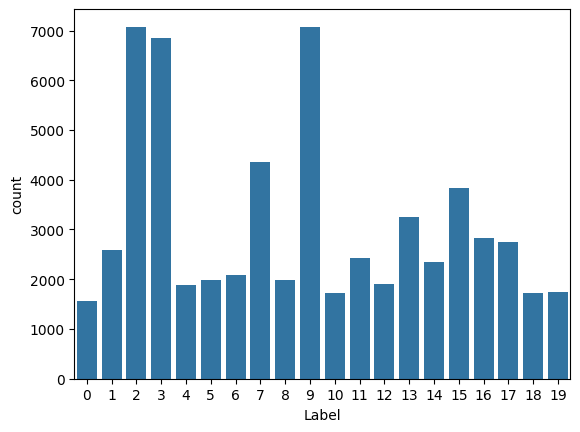

In [15]:
sns.countplot(x = train['Label'])

In [16]:
dg = pd.merge(train,df, left_on = 'Label', right_on = 'number', how = 'left')
dg.drop(['Label','number'], axis = 1, inplace = True)
dg

,TEXT,emoticons
0,Tis the season to sparkle #shareyourears #very...,✨
1,Bae is back on the blog today! Today's post is...,😍
2,"Happy birthday to my brother who says ""yes"" (u...",😜
3,just a little something we are working on for ...,✨
4,She so sexy #BMW #M4 #Smurf @ The Woodlands Ma...,😍
...,...,...
61980,Perfect for this cold weather and I got it for...,😉
61981,The Eshe Cuff Eshe is a Ethiopian girls name m...,✨
61982,We talked it out and Taylor and I don't have a...,❤
61983,"Hanging with number 6 son, while I wait for hu...",❤


In [17]:
test=pd.read_csv('Test.csv')
test.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...
...,...
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...


In [57]:
test.head()

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...


In [58]:
test.tail()

,TEXT
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...
25957,You making my life better is just part of your...


In [59]:
test.isna().sum()

TEXT    0
dtype: int64

In [60]:
test.dtypes

TEXT    object
dtype: object

In [61]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer

stemm = SnowballStemmer('english')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
train_text = train.TEXT
train_text

0        Tis the season to sparkle #shareyourears #very...
1        Bae is back on the blog today! Today's post is...
2        Happy birthday to my brother who says "yes" (u...
3        just a little something we are working on for ...
4        She so sexy #BMW #M4 #Smurf @ The Woodlands Ma...
                               ...                        
61980    Perfect for this cold weather and I got it for...
61981    The Eshe Cuff Eshe is a Ethiopian girls name m...
61982    We talked it out and Taylor and I don't have a...
61983    Hanging with number 6 son, while I wait for hu...
61984    just__dosha is performing Thursday night at #S...
Name: TEXT, Length: 61985, dtype: object

In [63]:
def clean(text):
  text=str(text).lower()
  text=re.sub('[^a-z0-9]+',' ',text)
  text=[stemm.stem(word) for word in text.split(' ') if (word not in sw)and len(word)>=3]
  text=' '.join(text)
  return text
  train_text=train_text.apply(clean)
  train_text

In [64]:
test_text=test.TEXT
test_text

0        Thought this was cool...#Repost (get_repost)・・...
1        Happy 4th! Corte madera parade. #everytownusa ...
2        Luv. Or at least something close to it. @ Unio...
3        There's a slice of pie under that whipped crea...
4        #thankyou for your thank you We adore you both...
                               ...                        
25953    Rest In Peace, Nana. thanks for playing cards ...
25954    I jus wan EAT #chowtime #swt30 @ Hartford, Con...
25955    Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956    Best Snow-cone I've EVER had!!! #bahamabucks #...
25957    You making my life better is just part of your...
Name: TEXT, Length: 25958, dtype: object

In [65]:
test_text = test_text.apply(clean)
test_text

0        thought cool repost get repost colorview shay ...
1        happi 4th cort madera parad everytownusa meric...
2        luv least someth close union hill richmond vir...
3                  slice pie whip cream houseofpi hous pie
4                thankyou thank ador plan moreeee host wed
                               ...                        
25953     rest peac nana thank play card lynn massachusett
25954       jus wan eat chowtim swt30 hartford connecticut
25955    play bloon supermonkey bloonsupermonkey2 bloon...
25956        best snow cone ever bahamabuck youhavetotryit
25957                          make life better part bless
Name: TEXT, Length: 25958, dtype: object

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x_train = vec.fit_transform(train_text)
x_test = vec.transform(test_text)
print(x_train)

  (0, 65790)	0.27343480466110737
  (0, 40471)	0.3642380654454606
  (0, 65796)	0.4888109405725805
  (0, 54987)	0.44931949086198003
  (0, 57513)	0.3750695305697492
  (0, 62913)	0.12290149151718584
  (0, 54283)	0.2756761722529796
  (0, 61332)	0.10043937971301015
  (0, 62803)	0.3314702829280792
  (1, 69552)	0.1842775795039769
  (1, 30661)	0.12969031017960522
  (1, 40033)	0.32702279591950995
  (1, 23037)	0.1351463585077868
  (1, 21519)	0.2844152318163485
  (1, 21261)	0.2691870160070069
  (1, 2063)	0.22633884103015914
  (1, 3080)	0.1777018224810174
  (1, 48900)	0.26149548670016565
  (1, 62945)	0.37705102332654267
  (1, 8238)	0.32276753658630597
  (1, 45530)	0.1583669468415673
  (1, 5584)	0.2084391096247101
  (1, 31493)	0.29681318178655813
  (1, 5725)	0.28089105288685223
  (1, 61332)	0.19391188809235496
  :	:
  (61983, 57157)	0.2818821510176315
  (61983, 44737)	0.29896079558354705
  (61983, 27230)	0.2695963841610713
  (61983, 51633)	0.3473498170045612
  (61983, 40867)	0.3882652867052103
  (61

In [67]:
print(x_test)

  (0, 62401)	0.3834538474659931
  (0, 55047)	0.5485996871821754
  (0, 51459)	0.6095853053672442
  (0, 24780)	0.2578877391863606
  (0, 14562)	0.3374925177612352
  (1, 40133)	0.508041658831006
  (1, 38281)	0.7394332028965362
  (1, 1226)	0.441737717821797
  (2, 66082)	0.3303420655659765
  (2, 64900)	0.3699199445387072
  (2, 51854)	0.42197956316968166
  (2, 37989)	0.4031925660304851
  (2, 35730)	0.3901958511188249
  (2, 28519)	0.34911874498212697
  (2, 13512)	0.37318314134848324
  (3, 67710)	0.3979854951042123
  (3, 56347)	0.45091680975776044
  (3, 47896)	0.7310658442522641
  (3, 15145)	0.3222177954928363
  (4, 67060)	0.5071927979484621
  (4, 61254)	0.47747129908297437
  (4, 61210)	0.27293408307373584
  (4, 48283)	0.4488449017754041
  (4, 29257)	0.48869403997609207
  (5, 65931)	0.29587615509623694
  :	:
  (25952, 21761)	0.2810388777261112
  (25952, 6637)	0.327337187021346
  (25952, 5742)	0.3498437306308149
  (25953, 61210)	0.26344190928452804
  (25953, 51563)	0.39230059454359034
  (25953, 

In [68]:
y_train = train['Label']
y_train

0        13
1         2
2         0
3        13
4         2
         ..
61980     4
61981    13
61982     9
61983     9
61984     2
Name: Label, Length: 61985, dtype: int64

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with limited complexity
fore = RandomForestClassifier(n_estimators=5, max_depth=30, random_state=50)
fore.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=5, random_state=50)

In [70]:
y_pred = fore.predict(x_test)
y_pred

array([16, 11,  2, ...,  2,  9,  9])

In [71]:
df_output = pd.DataFrame({'TEXT':test_text, 'Label':y_pred})
df_output = pd.merge(df_output, df, left_on = 'Label', right_on = 'number', how = 'left')
df_result = df_output.drop(['number', 'Label' ], axis = 1)
df_result

,TEXT,emoticons
0,thought cool repost get repost colorview shay ...,😎
1,happi 4th cort madera parad everytownusa meric...,🇺🇸
2,luv least someth close union hill richmond vir...,😍
3,slice pie whip cream houseofpi hous pie,😍
4,thankyou thank ador plan moreeee host wed,😍
...,...,...
25953,rest peac nana thank play card lynn massachusett,😍
25954,jus wan eat chowtim swt30 hartford connecticut,😍
25955,play bloon supermonkey bloonsupermonkey2 bloon...,😍
25956,best snow cone ever bahamabuck youhavetotryit,❤


In [73]:
pred = fore.predict(x_test[23013])
num = pred[0]
emoji = df.loc[(df['number']) == num].values[0][0]
emoji

'😂'